# Linear Regression of the Salary dataset to predict the trend within the Data  

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns



In [12]:
df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Bureau\\v03\\Salary_dataset.csv')


In [8]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df = df.drop(df.columns[0], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


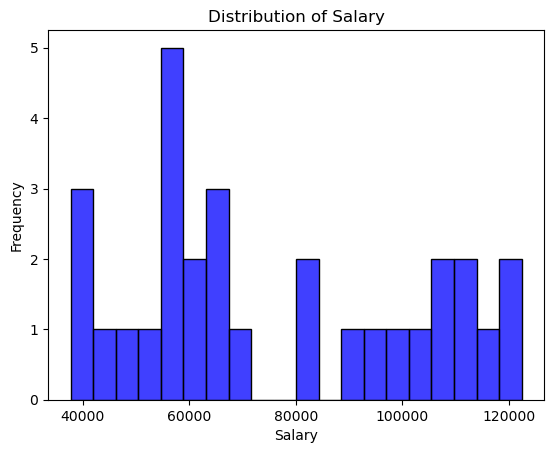

In [16]:

sns.histplot(df['Salary'], bins=20, color='blue')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

In [17]:
df.describe(include='all')

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [18]:
x = df[['YearsExperience']]
y = df['Salary']

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [20]:
y_pred = reg.predict(x)

In [21]:
print("R-squared:",reg.score(x, y).round(3))


R-squared: 0.957


In [22]:
print("Coefficient:",reg.coef_[0].round(3))

Coefficient: 9449.962


In [24]:
print("Intercept:",reg.intercept_.round(3))

Intercept: 24848.204


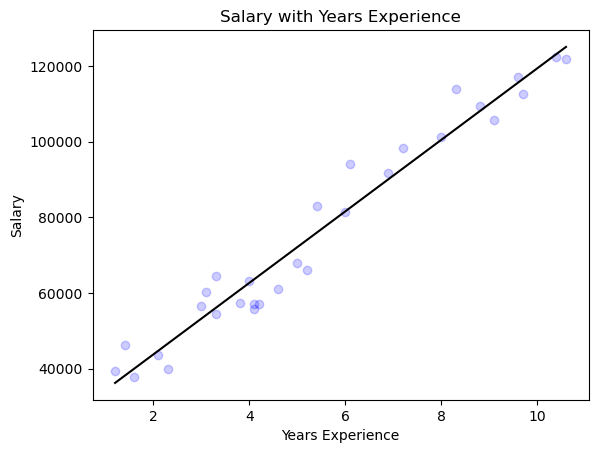

In [25]:
plt.title("Salary with Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.scatter(x, y, alpha = 0.2, color="blue")
plt.plot(x, y_pred, color="black")
plt.show()

In [26]:
df['Prediction'] = y_pred.round(1)
df['Residual'] = y - y_pred.round(1)
df['Difference%'] = (np.absolute(df['Residual'] / df['Salary'] * 100)).round(2)
df

,Unnamed: 0,YearsExperience,Salary,Prediction,Residual,Difference%
0,0,1.2,39344.0,36188.2,3155.8,8.02
1,1,1.4,46206.0,38078.2,8127.8,17.59
2,2,1.6,37732.0,39968.1,-2236.1,5.93
3,3,2.1,43526.0,44693.1,-1167.1,2.68
4,4,2.3,39892.0,46583.1,-6691.1,16.77
5,5,3.0,56643.0,53198.1,3444.9,6.08
6,6,3.1,60151.0,54143.1,6007.9,9.99
7,7,3.3,54446.0,56033.1,-1587.1,2.91
8,8,3.3,64446.0,56033.1,8412.9,13.05
9,9,3.8,57190.0,60758.1,-3568.1,6.24


In [27]:
df.describe()

,Unnamed: 0,YearsExperience,Salary,Prediction,Residual,Difference%
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000,76003.996667,0.003333,7.047333
std,8.803408,2.837888,27414.429785,26817.931561,5687.626567,5.174505
min,0.000000,1.200000,37732.000000,36188.200000,-7958.000000,0.230000
25%,7.250000,3.300000,56721.750000,56033.100000,-4088.450000,2.605000
50%,14.500000,4.800000,65238.000000,70208.000000,-459.900000,6.100000
75%,21.750000,7.800000,100545.750000,98557.900000,3372.625000,11.755000
max,29.000000,10.600000,122392.000000,125017.800000,11448.000000,17.590000
